In [5]:
# Install yfinance for the first time(https://pypi.org/project/yfinance/)
!pip install yfinance

     ---------------------------------------- 63.2/63.2 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 1.6 MB/s eta 0:00:00


In [6]:
import yfinance as yf
import pandas as pd

In [7]:
data = yf.Ticker('9988.HK')
df = data.history(period="max",interval="1d")

In [8]:
df['%return'] = df['Close'].pct_change(periods=180)*100

In [9]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,%return
count,880.000000,880.000000,880.000000,880.000000,8.800000e+02,880.0,880.0,700.000000
mean,164.076704,166.214091,161.750284,164.041364,3.964167e+07,0.0,0.0,-15.949414
std,67.344381,67.704533,66.779757,67.301519,2.626542e+07,0.0,0.0,28.804230
min,61.000000,64.500000,60.250000,61.450001,0.000000e+00,0.0,0.0,-65.612934
25%,97.062498,98.112501,94.287498,96.250000,2.187852e+07,0.0,0.0,-39.803163
50%,165.750000,168.349998,163.250000,165.550003,3.304017e+07,0.0,0.0,-23.917822
75%,218.000000,220.150002,215.049999,218.249996,4.928804e+07,0.0,0.0,4.916551
max,304.399994,309.399994,304.200012,307.399994,1.872886e+08,0.0,0.0,50.751438


In [10]:
mean = df.describe()['%return']['mean']
sd = df.describe()['%return']['std']

sharp_ratio = mean/sd
print(f"Sharp Ratio: {sharp_ratio}")

Sharp Ratio: -0.5537177506781606


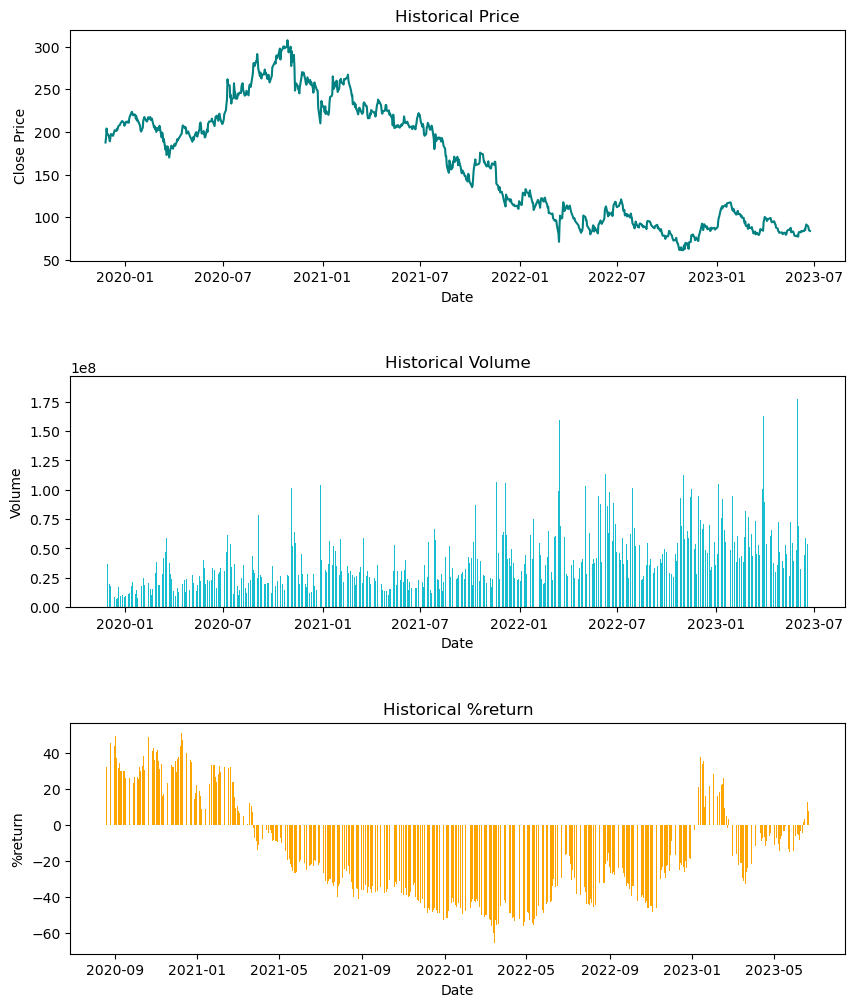

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

fig.set_figheight(12)
fig.set_figwidth(10)


ax1.plot(df.index,df['Close'],color='teal')
ax1.set_title("Historical Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price")

ax2.bar(df.index,df['Volume'],color='tab:cyan')
ax2.set_title("Historical Volume")
ax2.set_xlabel("Date")
ax2.set_ylabel("Volume")

ax3.bar(df.index,df['%return'],color='orange')
ax3.set_title("Historical %return")
ax3.set_xlabel("Date")
ax3.set_ylabel("%return")

plt.show()

In [12]:
# RESURSE: (https://pypi.org/project/mplfinance/)
# !pip install --upgrade mplfinance

     ---------------------------------------- 73.1/73.1 kB 1.3 MB/s eta 0:00:00


C:\Users\mhcrn\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


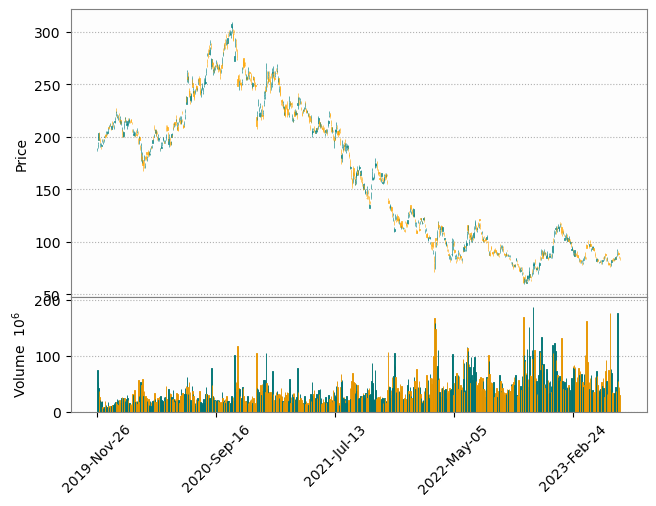

In [13]:
import mplfinance as mpf

mc = mpf.make_marketcolors(up='teal',down='orange',
                           edge='i',
                           wick='i',
                           volume='i',
                           ohlc='i')

s  = mpf.make_mpf_style(marketcolors=mc,facecolor='#fdfdfd',edgecolor='grey',gridaxis='horizontal',gridstyle='dotted')

mpf.plot(df, type='candle',volume=True, style=s)